# Project 2020

These are my solutions to the Project for the module Machine Learning and Statistics at GMIT. The author is Alexandra Macuga (G00376287@gmit.ie).

This is a Jupyter notebook that trains a model using the dataset. In the notebook I will explain my model and give an analysis of its accuracy.

## Dataset

Import the required modules and have a look at the dataset.

In [1]:
# Numerical arrays.
import numpy as np

# Machine learning - KMeans.
import sklearn.cluster as skcl

# Machine Learning- split dataset
from sklearn.model_selection import train_test_split

# Plotting.
import matplotlib.pyplot as plt

# Data frames.
import pandas as pd

# Plotting.
import seaborn as sns

# Neural networks.
import tensorflow.keras as kr

In [2]:
# Plot style.
plt.style.use("ggplot")

# Plot size.
plt.rcParams['figure.figsize'] = [14, 8]

In [3]:
# Data set.
df = pd.read_csv("powerproduction.csv")
# Numpy array
data = df.values

In [4]:
# Preview the first 10 lines of the loaded data 
df.head(10)

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


In [5]:
# Statistics
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


We have two columns in the dataset- *speed* and *power*. There is 500 values in both columns. The column *speed* has values between 0 to 25, and the column *power* has values between 0 to 113.556. 

## Plot the dataset

<AxesSubplot:xlabel='speed', ylabel='power'>

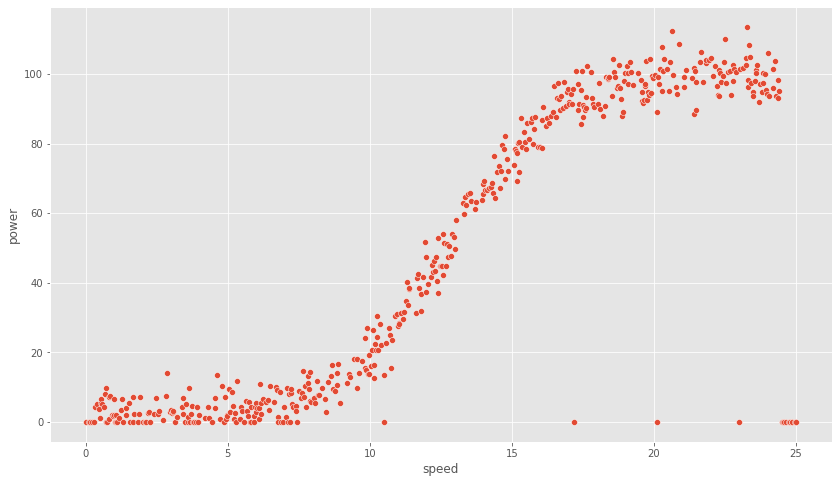

In [6]:
# plotusing seaborn scatterplot
sns.scatterplot(x = "speed", y = "power", data = df)

Based on the plot, it looks like there is a linear relatioship between speed and power. The higher the wind, the higher the power. However, in some observations where the speed is over 10, the power is 0. This can have a lot of reasons like recording errors, failures, maintenance etc. As outliers can skew statistical measures and data distributions, we should remove them from dataset.

In [7]:
# Count how many observations have power = 0 and speed > 10 (outliers)
df[(df.power == 0) & (df.speed >= 10)].count()

speed    14
power    14
dtype: int64

In [8]:
# Remove outliers from dataset
df = df.drop(df.loc[(df.power == 0) & (df.speed >= 10)].index)
df.count()

speed    486
power    486
dtype: int64

In [9]:
df.describe()

,speed,power
count,486.000000,486.000000
mean,12.298311,49.397720
std,7.084043,41.391996
min,0.000000,0.000000
25%,6.137250,5.868250
50%,12.349500,44.773000
75%,18.386750,93.751250
max,24.399000,113.556000


I decided to remove 14 observations from the dataset. The observations are outliers, where the speed was higher than 10 and the power was 0. There is 486 observations in the dataset now. The column speed has values between 0 to 24.399, and the column power has values between 0 to 113.556.

In [10]:
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# summarize the shape of the dataset
print(X.shape, y.shape)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# summarize the shape of the train and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(486, 1) (486,)
(388, 1) (98, 1) (388,) (98,)


Split the dataset into train set and test set. There is 388 observations in the train dataset and 98 observations in the test dataset. 

## Statsmodels

**Statsmodels** is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. An extensive list of result statistics are available for each estimator. The results are tested against existing statistical packages to ensure that they are correct.[1]

In [11]:
# Using statsmodels.
import statsmodels.api as sm

# Tell statmodels to include an intercept.
xwithc = sm.add_constant(data)

# Create a model.
msm = sm.OLS(y, xwithc)
# Fit the data.
rsm = msm.fit()
# Print a summary.
print(rsm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.812e+33
Date:                Fri, 08 Jan 2021   Prob (F-statistic):               0.00
Time:                        13:37:09   Log-Likelihood:                 14777.
No. Observations:                 486   AIC:                        -2.955e+04
Df Residuals:                     483   BIC:                        -2.954e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.809e-14    1.7e-15    -16.478      0.0

## Regression in keras

### Linear regression


To find the relationship between speed and power, we can use regression. That relatioship is then used to predict future events. *Linear regression* uses the relationship between the data-points to draw a straight line through all them. This line can be used to predict future values.[2]

In [12]:
# Create a neural network with one neuron.
model = kr.models.Sequential()
model.add(kr.layers.Dense(1, input_shape=(1,), activation="linear", kernel_initializer='ones', bias_initializer='zeros'))
model.compile('adam', loss='mean_squared_error')

In [13]:
# Train the neural network on our training data.
model.fit(X_train, y_train, epochs=500)

Epoch 1/500
13/13 [==============================] - 1s 1ms/step - loss: 2303.4667
Epoch 2/500
13/13 [==============================] - 0s 2ms/step - loss: 2462.9026
Epoch 3/500
13/13 [==============================] - 0s 2ms/step - loss: 2432.8923
Epoch 4/500
13/13 [==============================] - 0s 2ms/step - loss: 2425.0650
Epoch 5/500
13/13 [==============================] - 0s 2ms/step - loss: 2490.7419
Epoch 6/500
13/13 [==============================] - 0s 2ms/step - loss: 2361.4695
Epoch 7/500
13/13 [==============================] - 0s 1ms/step - loss: 2310.1079
Epoch 8/500
13/13 [==============================] - 0s 2ms/step - loss: 2458.9492
Epoch 9/500
13/13 [==============================] - 0s 2ms/step - loss: 2350.1763
Epoch 10/500
13/13 [==============================] - 0s 2ms/step - loss: 2320.4968
Epoch 11/500
13/13 [==============================] - 0s 1ms/step - loss: 2188.7009
Epoch 12/500
13/13 [==============================] - 0s 2ms/step - loss: 2313.5570
E

13/13 [==============================] - 0s 1ms/step - loss: 1247.0684
Epoch 99/500
13/13 [==============================] - 0s 3ms/step - loss: 1134.8091
Epoch 100/500
13/13 [==============================] - 0s 3ms/step - loss: 1182.7325
Epoch 101/500
13/13 [==============================] - 0s 3ms/step - loss: 1132.2664
Epoch 102/500
13/13 [==============================] - 0s 2ms/step - loss: 1181.9337
Epoch 103/500
13/13 [==============================] - 0s 4ms/step - loss: 1099.5186
Epoch 104/500
13/13 [==============================] - 0s 2ms/step - loss: 1157.6112
Epoch 105/500
13/13 [==============================] - 0s 2ms/step - loss: 1176.5569
Epoch 106/500
13/13 [==============================] - 0s 2ms/step - loss: 1101.1894
Epoch 107/500
13/13 [==============================] - 0s 2ms/step - loss: 1131.9297
Epoch 108/500
13/13 [==============================] - 0s 2ms/step - loss: 1091.0901
Epoch 109/500
13/13 [==============================] - 0s 2ms/step - loss: 1086.

13/13 [==============================] - 0s 2ms/step - loss: 540.8880
Epoch 195/500
13/13 [==============================] - 0s 2ms/step - loss: 596.9658
Epoch 196/500
13/13 [==============================] - 0s 2ms/step - loss: 563.7994
Epoch 197/500
13/13 [==============================] - 0s 1ms/step - loss: 561.6068
Epoch 198/500
13/13 [==============================] - 0s 2ms/step - loss: 554.3146
Epoch 199/500
13/13 [==============================] - 0s 1ms/step - loss: 557.8017
Epoch 200/500
13/13 [==============================] - 0s 2ms/step - loss: 552.3848
Epoch 201/500
13/13 [==============================] - 0s 2ms/step - loss: 496.5467
Epoch 202/500
13/13 [==============================] - 0s 2ms/step - loss: 553.1138
Epoch 203/500
13/13 [==============================] - 0s 2ms/step - loss: 527.7446
Epoch 204/500
13/13 [==============================] - 0s 2ms/step - loss: 513.2341
Epoch 205/500
13/13 [==============================] - 0s 2ms/step - loss: 497.4189
Epoch 

13/13 [==============================] - 0s 3ms/step - loss: 342.1279
Epoch 292/500
13/13 [==============================] - 0s 2ms/step - loss: 339.4604
Epoch 293/500
13/13 [==============================] - 0s 2ms/step - loss: 336.2169
Epoch 294/500
13/13 [==============================] - 0s 2ms/step - loss: 324.0966
Epoch 295/500
13/13 [==============================] - 0s 2ms/step - loss: 326.4837
Epoch 296/500
13/13 [==============================] - 0s 2ms/step - loss: 327.4559
Epoch 297/500
13/13 [==============================] - 0s 2ms/step - loss: 317.6484
Epoch 298/500
13/13 [==============================] - 0s 2ms/step - loss: 340.1334
Epoch 299/500
13/13 [==============================] - 0s 2ms/step - loss: 324.8448
Epoch 300/500
13/13 [==============================] - 0s 2ms/step - loss: 310.2185
Epoch 301/500
13/13 [==============================] - 0s 2ms/step - loss: 339.5143
Epoch 302/500
13/13 [==============================] - 0s 2ms/step - loss: 306.8336
Epoch 

13/13 [==============================] - 0s 2ms/step - loss: 269.8743
Epoch 388/500
13/13 [==============================] - 0s 2ms/step - loss: 277.3901
Epoch 389/500
13/13 [==============================] - 0s 3ms/step - loss: 284.2655
Epoch 390/500
13/13 [==============================] - 0s 1ms/step - loss: 279.3674
Epoch 391/500
13/13 [==============================] - 0s 2ms/step - loss: 279.4339
Epoch 392/500
13/13 [==============================] - 0s 2ms/step - loss: 271.5071
Epoch 393/500
13/13 [==============================] - 0s 2ms/step - loss: 282.8059
Epoch 394/500
13/13 [==============================] - 0s 3ms/step - loss: 280.4118
Epoch 395/500
13/13 [==============================] - 0s 3ms/step - loss: 266.0009
Epoch 396/500
13/13 [==============================] - 0s 3ms/step - loss: 275.8950
Epoch 397/500
13/13 [==============================] - 0s 2ms/step - loss: 292.3447
Epoch 398/500
13/13 [==============================] - 0s 2ms/step - loss: 259.4924
Epoch 

13/13 [==============================] - 0s 3ms/step - loss: 263.2612
Epoch 485/500
13/13 [==============================] - 0s 2ms/step - loss: 268.5660
Epoch 486/500
13/13 [==============================] - 0s 3ms/step - loss: 274.9772
Epoch 487/500
13/13 [==============================] - ETA: 0s - loss: 272.686 - 0s 2ms/step - loss: 265.6572
Epoch 488/500
13/13 [==============================] - 0s 2ms/step - loss: 266.9073
Epoch 489/500
13/13 [==============================] - 0s 2ms/step - loss: 270.7868
Epoch 490/500
13/13 [==============================] - 0s 3ms/step - loss: 261.4621
Epoch 491/500
13/13 [==============================] - 0s 3ms/step - loss: 269.6206
Epoch 492/500
13/13 [==============================] - 0s 2ms/step - loss: 249.6941
Epoch 493/500
13/13 [==============================] - 0s 2ms/step - loss: 262.2652
Epoch 494/500
13/13 [==============================] - 0s 2ms/step - loss: 258.5303
Epoch 495/500
13/13 [==============================] - 0s 2ms/st

In [14]:
# Take four hand-picked values and see their predictions.
model.predict([1.0,8.0,13.0,23.0])

array([[ 5.2895904],
       [35.268986 ],
       [56.68284  ],
       [99.510544 ]], dtype=float32)

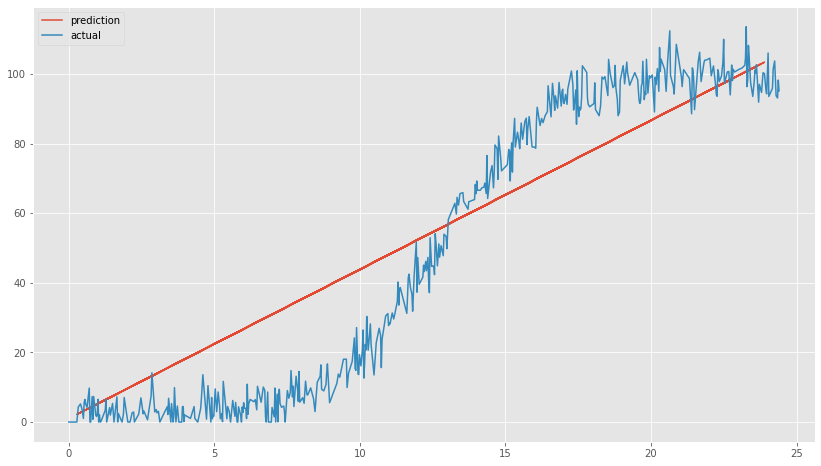

In [15]:
# Let's plot our predictions of the x values we trained on
plt.plot(X_test, model.predict(X_test), label='prediction') 
plt.plot(X,y, label = 'actual')
plt.legend();

In [16]:
# Evaluate the neural network on the test data.
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 274.2282


274.2281799316406

The plot and the evaluation are both showing that this dataset is a bad fit for linear regression.

### Polynomial

In [17]:
poly = pd.DataFrame()
poly['x'] = np.linspace(-10.0, 10.0, 1000)
poly['y'] = poly['x'].apply(f)

NameError: name 'f' is not defined

In [ ]:
# Have a look.
plt.plot(poly['x'], poly['y']);

In [ ]:
# Re-build our model.
model = kr.models.Sequential()
model.add(kr.layers.Dense(1, input_shape=(1,), activation='linear', kernel_initializer="ones", bias_initializer="zeros"))
model.compile('adam', loss='mean_squared_error')

In [ ]:
# Fit the data.
model.fit(poly['x'], poly['y'], epochs=500)

In [ ]:
# Plot the predictions (on the training set itself).
plt.plot(poly['x'], poly['y'], label='actual')
plt.plot(poly['x'], model.predict(poly['x']), label='prediction')
plt.legend();

### Sigmoids

In [ ]:
# Change the activation function.
model = kr.models.Sequential()
model.add(kr.layers.Dense(1, input_shape=(1,), activation='sigmoid', kernel_initializer="ones", bias_initializer="zeros"))
model.compile('adam', loss='mean_squared_error')

In [ ]:
# Without training, let's have a look at the output.
sigdata = data
sigdata['x'] = data.speed
sigdata['y'] = data.power

In [ ]:
# Let's see what that looks like.
plt.plot(sigdata['x'], sigdata['y']);

### Back to the polynomial

In [ ]:
# Same polynomial.
f = lambda x: 2.0 * x**2 + 3.0 * x + 4.0

poly = pd.DataFrame()
poly['x'] = np.linspace(-10.0, 10.0, 1000)
poly['y'] = poly['x'].apply(f)

In [ ]:
# Train a different model.
model = kr.models.Sequential()
model.add(kr.layers.Dense(50, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile(kr.optimizers.Adam(lr=0.001), loss='mean_squared_error')

In [ ]:
# Fit the data.
model.fit(poly['x'], poly['y'], epochs=500, batch_size=10)

In [ ]:
# Now let's see.
plt.plot(poly['x'], poly['y'], label='actual')
plt.plot(poly['x'], model.predict(poly['x']), label='prediction')
plt.legend();

## References

[1] https://www.statsmodels.org/stable/index.html

[2] https://www.w3schools.com/python/python_ml_linear_regression.asp